In [40]:
import utils
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np

In [2]:
def showGanador(ranking, title, label, color):
    fig = plt.figure(figsize=(18,12), dpi= 60)
    ax1 =  plt.scatter(ranking.ranking, ranking.index, s=30, alpha=1, label=label, color=color)

    plt.yticks(ranking.index, ranking.Equipo)
    plt.title(title, fontdict={'size':20})
    plt.xlabel('Ranking')
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlim(-0.01, 1.01)
    plt.legend()
    plt.show()

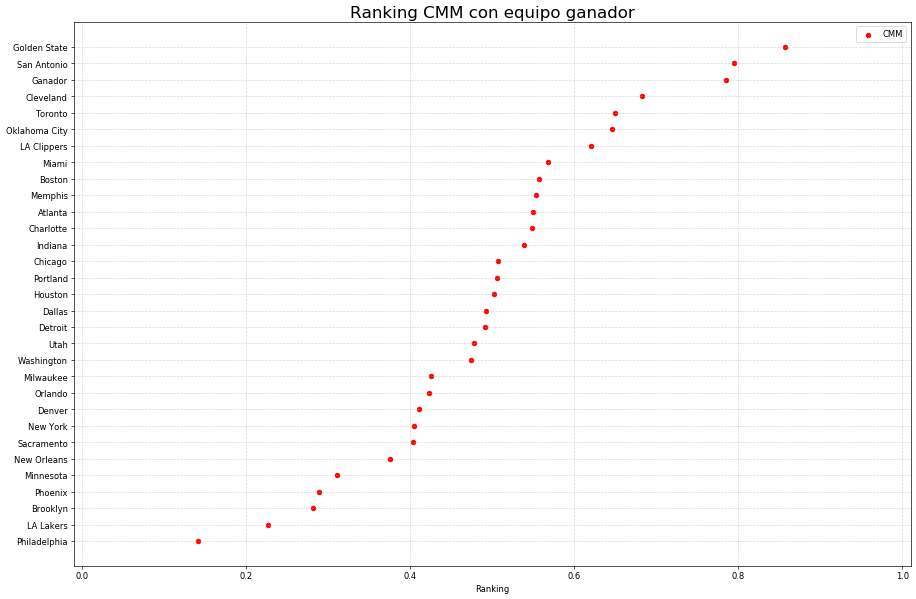

In [3]:
utils.runAllMethods("../data/ganador_cmm.dat")

ranking = utils.getRankingGanador(0)
ranking.sort_values('ranking', inplace=True)
ranking.reset_index(inplace=True)

showGanador(ranking, 'Ranking CMM con equipo ganador', 'CMM', 'red')

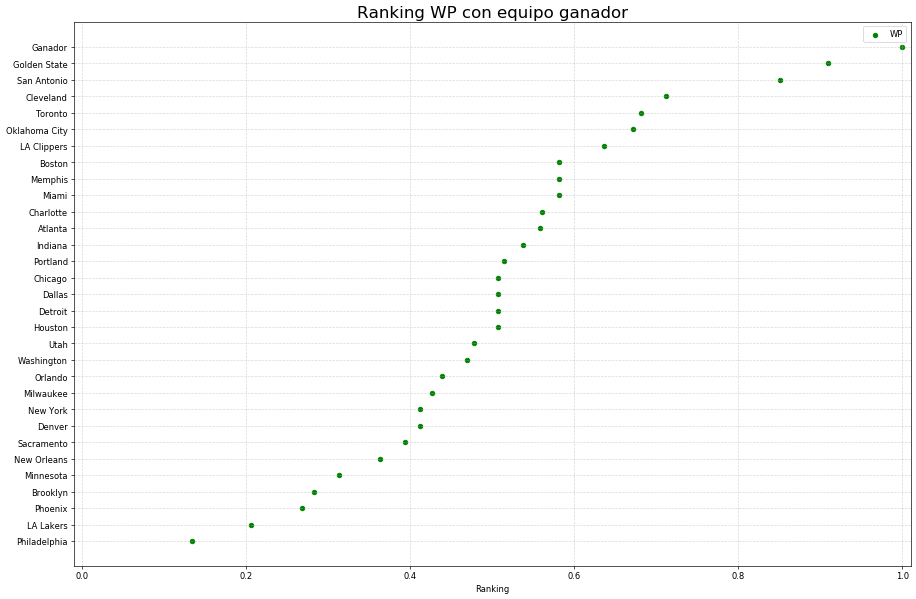

In [7]:
utils.runAllMethods("../data/ganador_wp.dat")

ranking = utils.getRankingGanador(1)
ranking.sort_values('ranking', inplace=True)
ranking.reset_index(inplace=True)

showGanador(ranking, 'Ranking WP con equipo ganador', 'WP', 'green')

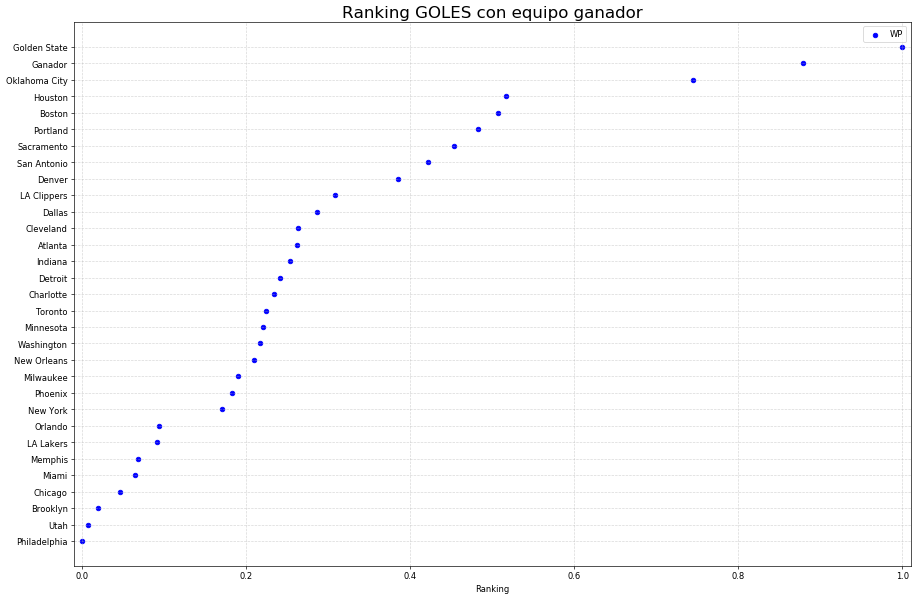

In [8]:
utils.runAllMethods("../data/ganador_goles.dat")

ranking = utils.getRankingGanador(2)
ranking.sort_values('ranking', inplace=True)
ranking.reset_index(inplace=True)

showGanador(ranking, 'Ranking GOLES con equipo ganador', 'WP', 'blue')

In [3]:
def crearScores(rival, jugados, ganados):
    with open ("../data/ganador_cmm_base.dat", "r") as f:
        contenido = f.read()
        with open ("../data/ganador_cmm_actual.dat", "w") as nf:
            nf.write(contenido)

            for i in range(ganados):
                nf.write("\n20160316 31 1 " + str(rival) + " 0")
            for i in range(jugados - ganados):
                nf.write("\n20160316 31 0 " + str(rival) + " 1")

            nf.close()
        f.close()

In [4]:
def crearRandomScope(jugados, ganados):
    with open ("../data/ganador_cmm_base.dat", "r") as f:
        contenido = f.read()
        with open ("../data/ganador_cmm_actual.dat", "w") as nf:
            nf.write(contenido)
            for i in range(ganados):
                equipo = random.randint(1, 30)
                nf.write("\n20160316 31 1 " + str(equipo) + " 0")
            for i in range(jugados - ganados):
                equipo = random.randint(1, 30)
                nf.write("\n20160316 31 0 " + str(equipo) + " 1")

            nf.close()
        f.close()

In [51]:
def runTest(rival, jugados):
    data = pd.DataFrame([],columns=["Posicion", "Ganados"])

    for i in range(jugados + 1):

        crearScores(rival, jugados, i)
        utils.runAllMethods("../data/ganador_cmm_actual.dat")

        ranking = utils.getRankingGanador(0)
        ranking.sort_values('ranking', inplace=True, ascending=False)
        ranking.reset_index(inplace=True)

        posicion = int(ranking[ranking['Equipo'] == 'Ganador'].index[0]) + 1
        data.loc[i] = [posicion, i]
    return data

def runRandomTest(jugados):
    data = pd.DataFrame([],columns=["Posicion", "Ganados"])

    for i in range(jugados + 1):

        crearRandomScope(jugados, i)
        utils.runAllMethods("../data/ganador_cmm_actual.dat")

        ranking = utils.getRankingGanador(0)
        ranking.sort_values('ranking', inplace=True, ascending=False)
        ranking.reset_index(inplace=True)

        posicion = int(ranking[ranking['Equipo'] == 'Ganador'].index[0]) + 1
        data.loc[i] = [posicion, i]
    return data

def graficar(datos, labels, title):
    fig = plt.figure(figsize=(18,12), dpi= 60)
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    
    for i in range(len(datos)):
        plt.plot(datos[i].Ganados, datos[i].Posicion, label=labels[i], color=colors[i])

    plt.gca().invert_yaxis()
    plt.xticks(np.arange(0, 11))
    plt.yticks(np.arange(31, 0, -1))
    plt.title(title, fontdict={'size':20})
    plt.ylabel('Posicion')
    plt.xlabel('Partidos Ganados')
    plt.grid(linestyle='--', alpha=1)
    plt.xlim(0, 10)
    plt.ylim(32, 0)
    plt.legend()
    plt.show()

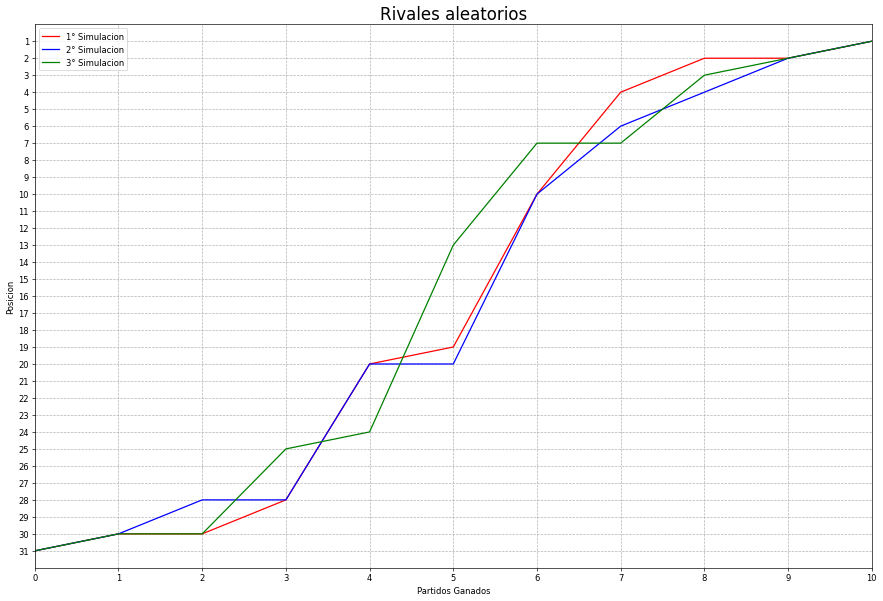

In [52]:
data1 = runRandomTest(10)
data2 = runRandomTest(10)
data3 = runRandomTest(10)
graficar([data1, data2, data3], ['1° Simulacion', '2° Simulacion', '3° Simulacion'], 'Rivales aleatorios')

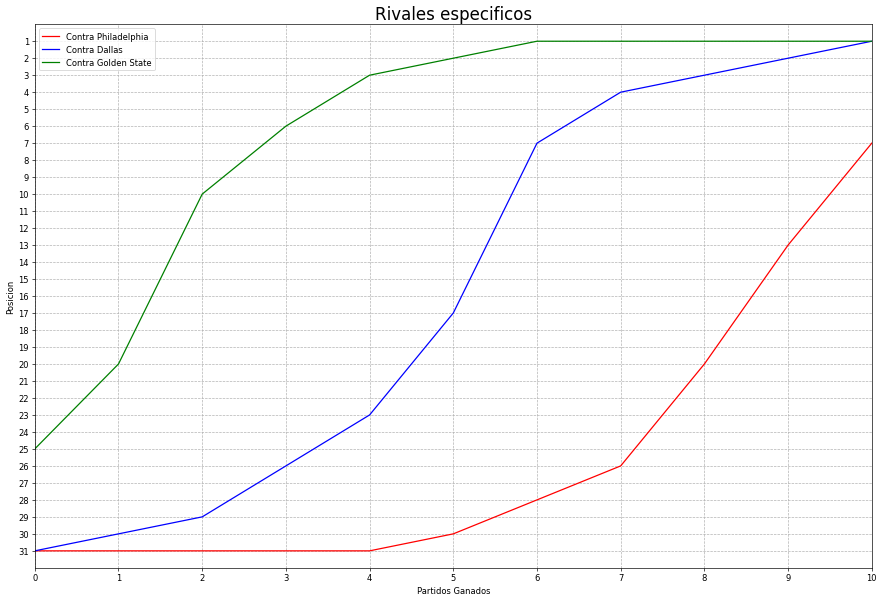

In [53]:
data1 = runTest(23,10)
data2 = runTest(7,10)
data3 = runTest(10,10)

graficar([data1, data2, data3], ['Contra Philadelphia', 'Contra Dallas', 'Contra Golden State'], 'Rivales especificos')

In [ ]:
#armo grafico con 3 ejemplos de partidas al azar
#luego armo comparacion con 3 ejemplos, jugando con el peor, del medio y mejor
#luego el grafico total con la diferencia

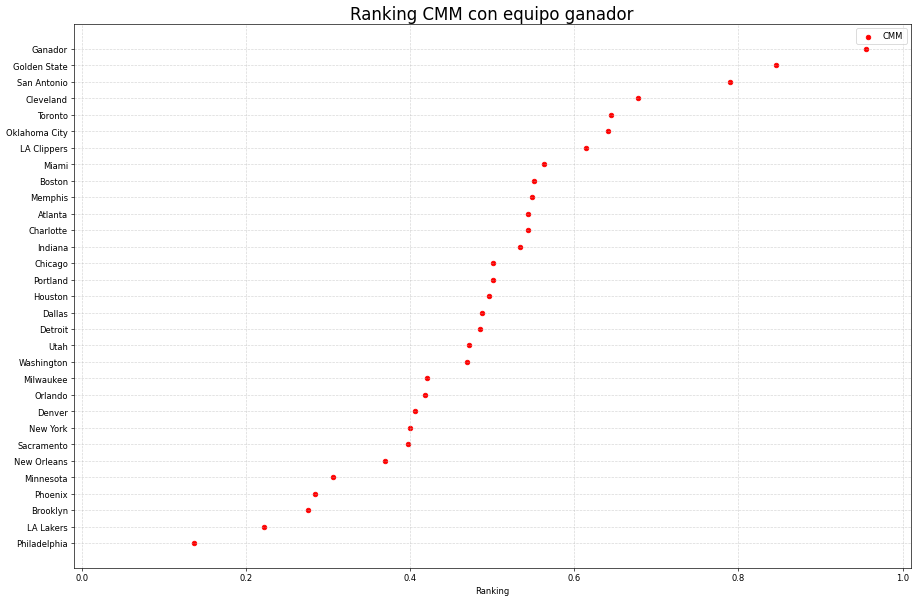

In [54]:
crearScores(10, 10, 6)
utils.runAllMethods("../data/ganador_cmm_actual.dat")

ranking = utils.getRankingGanador(0)
ranking.sort_values('ranking', inplace=True)
ranking.reset_index(inplace=True)

showGanador(ranking, 'Ranking CMM con equipo ganador', 'CMM', 'red')